## Countvectorizer 

doc=["One Cent, Two Cents, Old Cent, New Cent: All About Money"]
 
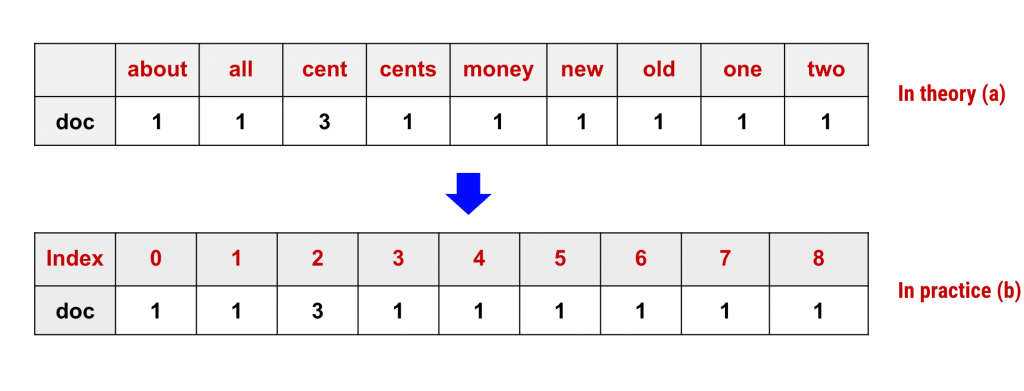

Notice that here we have 9 unique words. So 9 columns. Each column in the matrix represents a unique word in the vocabulary, while each row represents the document in our dataset. In this case, we only have one book title (i.e. the document), and therefore we have only 1 row. The values in each cell are the word counts. Note that with this representation, counts of some words could be 0 if the word did not appear in the corresponding document.

While visually it’s easy to think of a word matrix representation as Figure 1 (a), in reality, these words are transformed to numbers and these numbers represent positional index in the sparse matrix as seen in Figure 1(b).

With CountVectorizer we are converting raw text to a numerical vector representation of words and n-grams. This makes it easy to directly use this representation as features (signals) in Machine Learning tasks such as for text classification and clustering.

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
 
cat_in_the_hat_docs=[
       "One Cent, Two Cents, Old Cent, New Cent: All About Money (Cat in the Hat's Learning Library",
       "Inside Your Outside: All About the Human Body (Cat in the Hat's Learning Library)",
       "Oh, The Things You Can Do That Are Good for You: All About Staying Healthy (Cat in the Hat's Learning Library)",
       "On Beyond Bugs: All About Insects (Cat in the Hat's Learning Library)",
       "There's No Place Like Space: All About Our Solar System (Cat in the Hat's Learning Library)" 
      ]

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(cat_in_the_hat_docs)
count_vector=cv.fit_transform(cat_in_the_hat_docs)

What happens above is that the 5 books titles are preprocessed, tokenized and represented as a sparse matrix as explained in the introduction. By default, CountVectorizer does the following:

1)lowercases your text (set lowercase=false if you don’t want lowercasing)
2)uses utf-8 encoding
3)performs tokenization (converts raw text to smaller units of text)
4)uses word level tokenization (meaning each word is treated as a separate token)
5)ignores single characters during tokenization (say goodbye to words like ‘a’ and ‘I’)



Now, let’s look at the vocabulary (collection of unique words from our documents):

In [24]:
# show resulting vocabulary; the numbers are not counts, they are the position in the sparse vector.
cv.vocabulary_


{'one': 28,
 'cent': 8,
 'two': 40,
 'cents': 9,
 'old': 26,
 'new': 23,
 'all': 1,
 'about': 0,
 'money': 22,
 'cat': 7,
 'in': 16,
 'the': 37,
 'hat': 13,
 'learning': 19,
 'library': 20,
 'inside': 18,
 'your': 42,
 'outside': 30,
 'human': 15,
 'body': 4,
 'oh': 25,
 'things': 39,
 'you': 41,
 'can': 6,
 'do': 10,
 'that': 36,
 'are': 2,
 'good': 12,
 'for': 11,
 'staying': 34,
 'healthy': 14,
 'on': 27,
 'beyond': 3,
 'bugs': 5,
 'insects': 17,
 'there': 38,
 'no': 24,
 'place': 31,
 'like': 21,
 'space': 33,
 'our': 29,
 'solar': 32,
 'system': 35}

As we are using all the defaults, these are all word level tokens, lowercased. Note that the numbers here are not counts, they are the position in the sparse vector. Now, let’s check the shape:

In [25]:
#shape of count vector: 5 docs (book titles) and 43 unique words
count_vector.shape
 

(5, 43)

# CountVectorizer and Stop Words
Now, the first thing you may want to do, is to eliminate stop words from your text as it has limited predictive power and may not help with downstream tasks such as text classification. Stop word removal is a breeze with CountVectorizer and it can be done in several ways:

1)Use a custom stop word list that you provide
2)Use sklearn’s built in English stop word list (not recommended)
3)Create corpora specific stop words using max_df and min_df (highly recommended and will be covered later in this tutorial)
  
  Let’s look at the 3 ways of using stop words.

In [27]:
cv = CountVectorizer(cat_in_the_hat_docs,stop_words=["all","in","the","is","and"])
count_vector=cv.fit_transform(cat_in_the_hat_docs)
count_vector.shape
cv.stop_words

['all', 'in', 'the', 'is', 'and']

In this example, we provide a list of words that act as our stop words. Notice that the shape has gone from (5,43) to (5,40) because of the stop words that were removed. Note that we can actually load stop words directly from a file into a list and supply that as the stop word list.

To check the stop words that are being used (when explicitly specified), simply access cv.stop_words.

In [28]:
print(count_vector.toarray())

[[1 0 0 0 0 0 1 3 1 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0
  0 1 0 0]
 [1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
  0 0 0 1]
 [1 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0
  1 0 2 0]
 [1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]
 [1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1
  0 0 0 0]]


In [29]:
#Loading NLTK
import nltk
from nltk.corpus import stopwords
cv = CountVectorizer(cat_in_the_hat_docs,stop_words=stopwords.words("english"))
count_vector=cv.fit_transform(cat_in_the_hat_docs)
count_vector.shape

(5, 28)

In [30]:
sparse_matrix=(print(count_vector.toarray()))

[[0 0 0 1 3 1 0 1 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1]
 [0 1 0 1 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 1 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0]
 [1 0 1 1 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0]]
